In [1]:
##### This notebook is still buggy for looking at more than one set per calibration run. 
##### It should work fine for only set_0 in each cell. I can make it more user friendly eventually

import numpy as np
import psana as ps
import matplotlib.pyplot as plt
import sys
import time
import pickle
import os
from Functions import *
from raw_data_class import RawData as RDC
from Functions.plot_average import gather_shots
from processed_data_class import processed_data_class as PDC
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')


Loaded processed_data for run run_168
Loaded processed_data for run run_169
Loaded processed_data for run run_170
Loaded processed_data for run run_172
Loaded processed_data for run run_174
Loaded processed_data for run run_166
Loaded processed_data for run run_167
Loaded processed_data for run run_170
Loaded processed_data for run run_172
Loaded processed_data for run run_174
Loaded processed_data for run run_171
Loaded processed_data for run run_173
Loaded processed_data for run run_175
spec runs [[166, 167]] [166, 167, 170, 172, 174, 171, 173, 175]


<IPython.core.display.Javascript object>


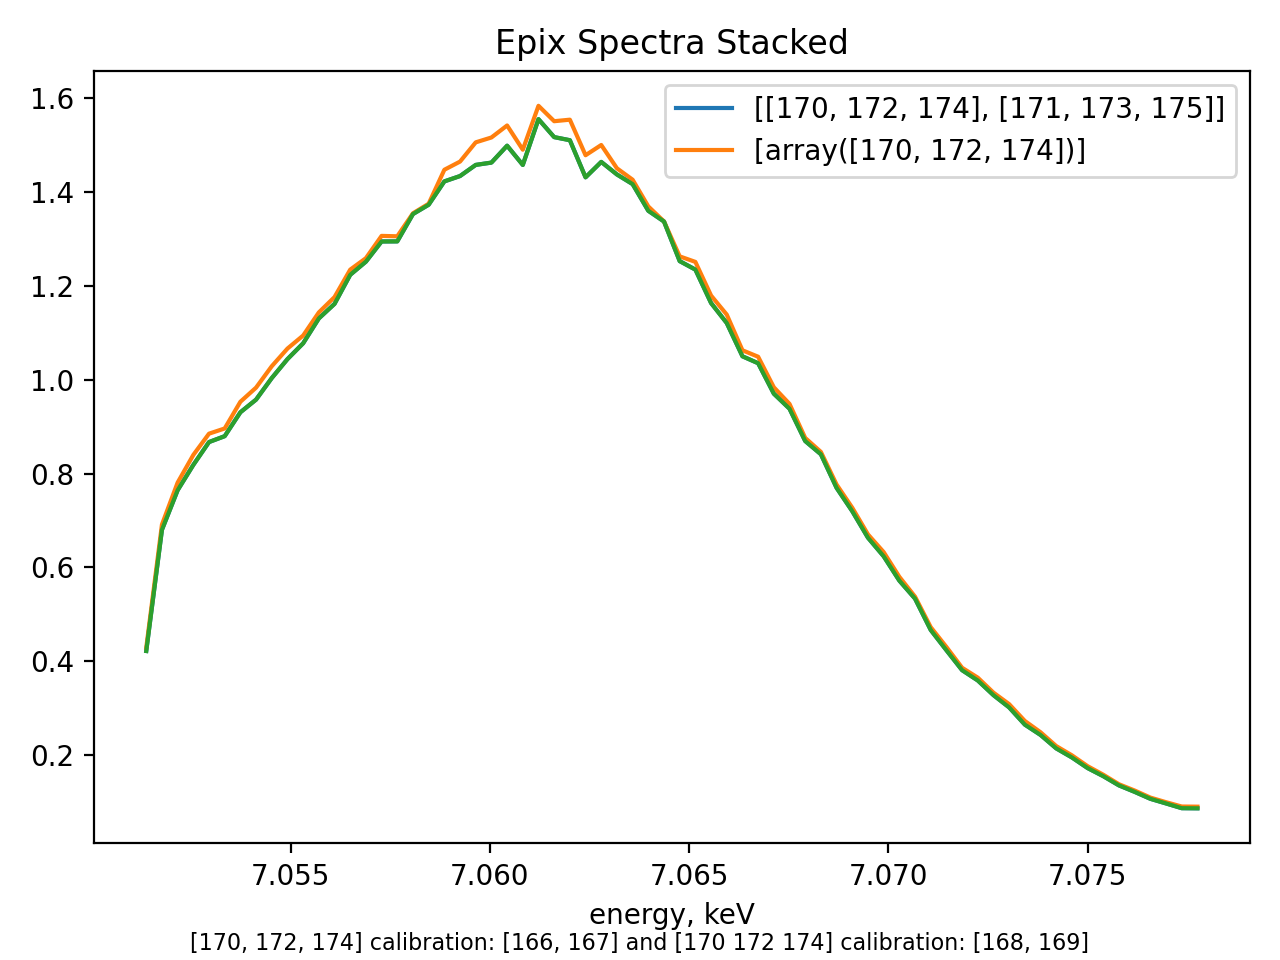

length 2


<IPython.core.display.Javascript object>


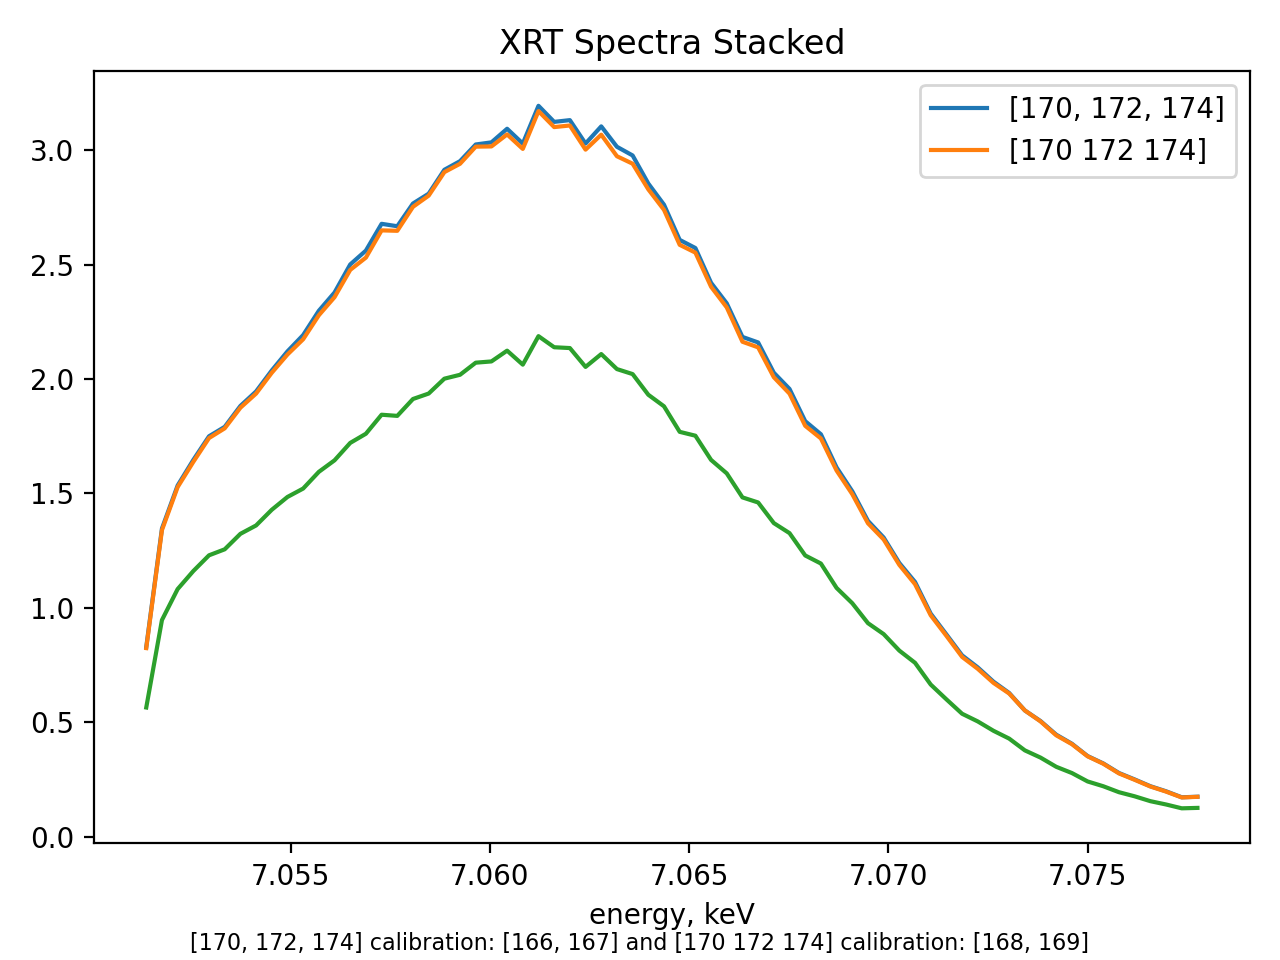

<IPython.core.display.Javascript object>


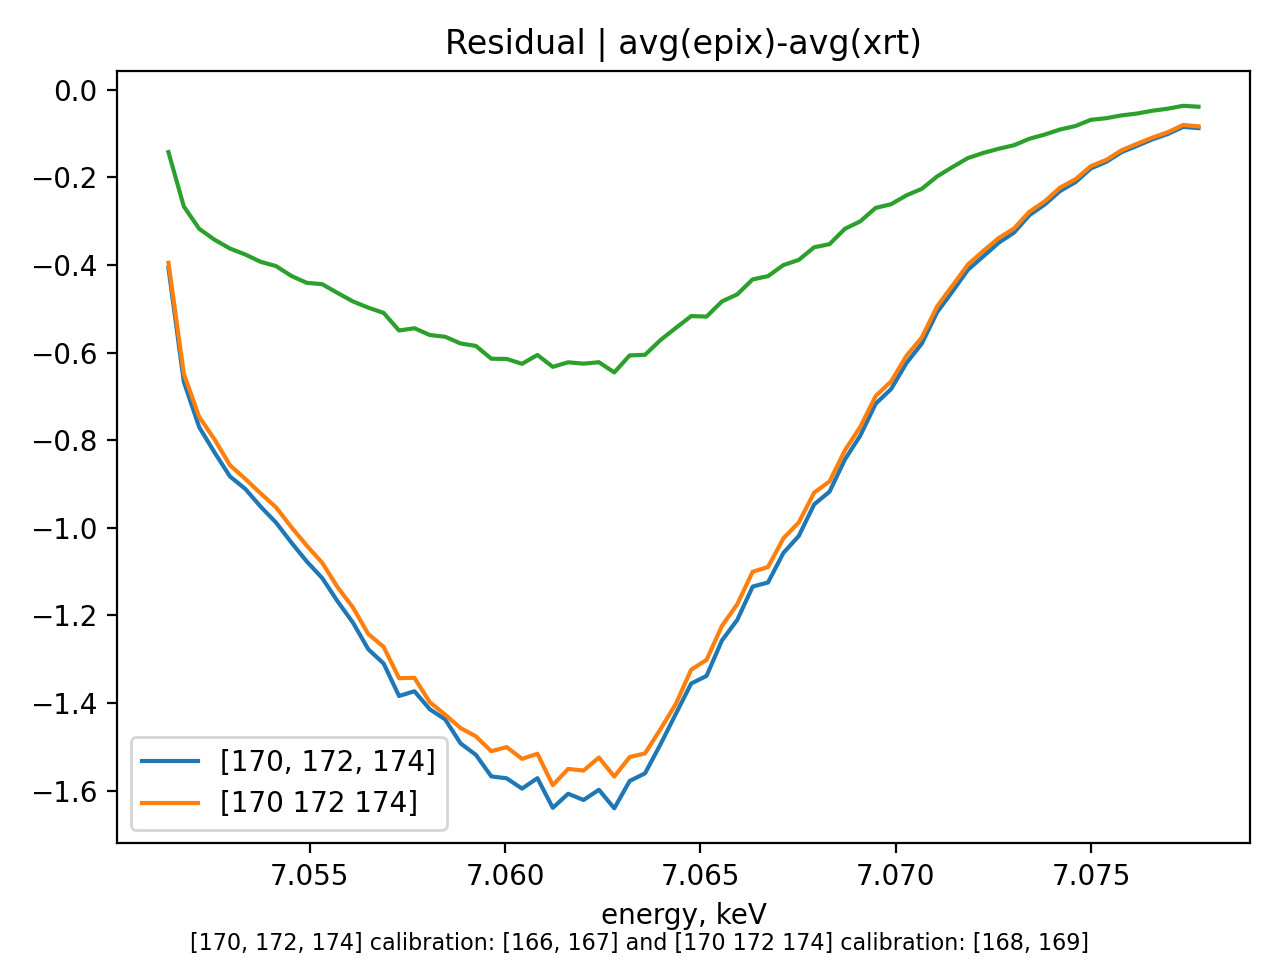

<IPython.core.display.Javascript object>


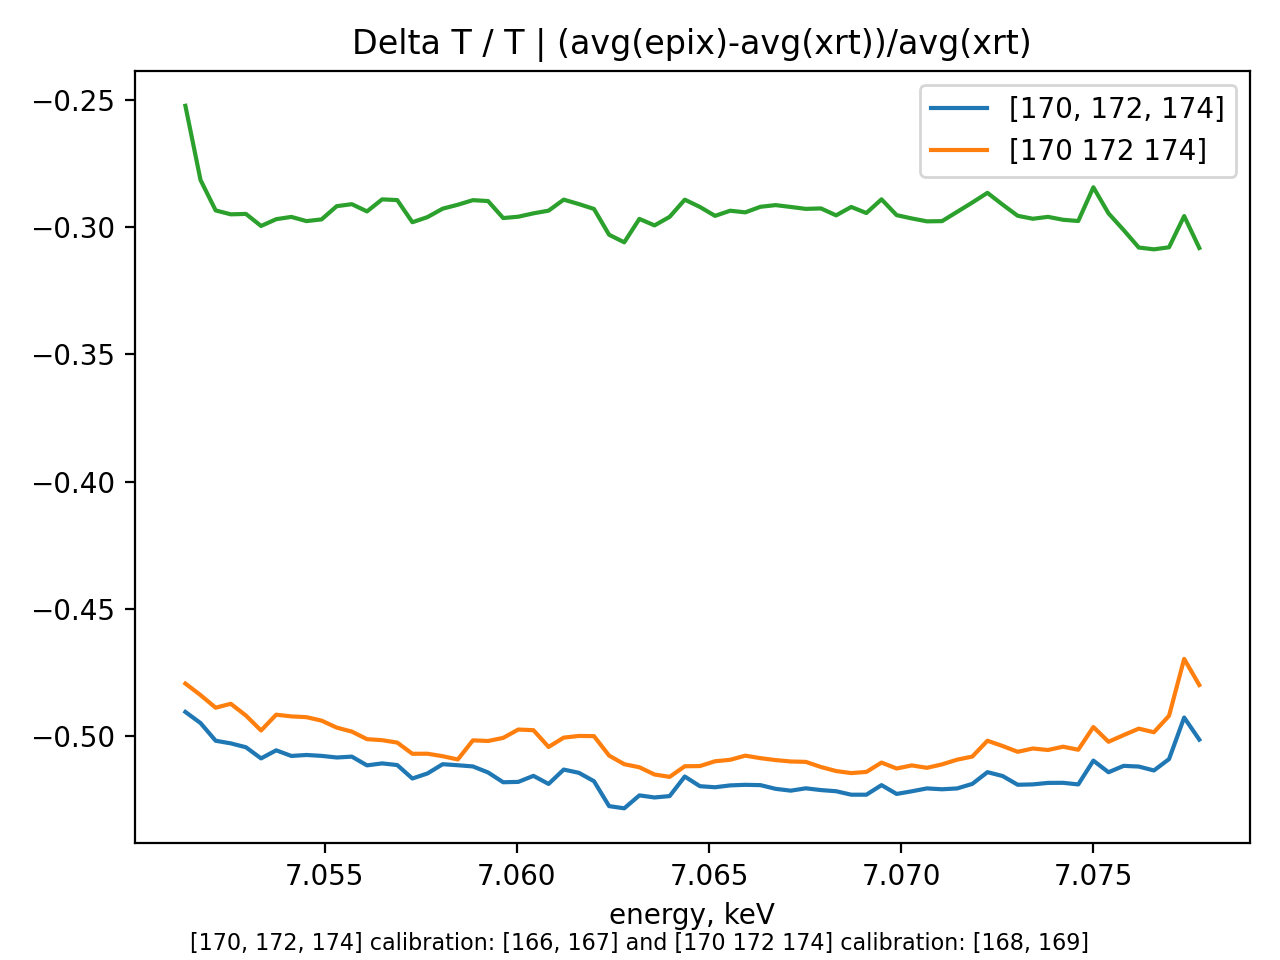

In [2]:
### Create sets of variables to compare different calibration runs

set_0_comp = [170,172,174]
# set_0 = [178,179,180]
# set_0 = [181,182,183]
# set_0 = [170,172,174,184,186,188]
# set_0 = [171,173,175,185,187,189]
# set_0 = [190,192]
# set_0 = [191,193]
# set_0 = [178,180,182]
# set_0 = [179,181,183]
spec_cal_runs_comp = [[168,169]]  # Select runs with no sample in line
scans_to_plot_comp = set_0_comp

set_0 = set_0_comp
set_1 = [171,173,175]
spec_cal_runs = [[166,167]]  # Select runs with no sample in line for comparison
scans_to_plot = set_0,set_1

plot_conds = [True,True,True,True] # epix, xrt, resid, deltaT_T
plot_meanwise = True                 # deltaT_T like avg(epix)-avg(xrt))/avg(xrt)
plot_shotwise = False                  # deltaT_T like avg[(epix-xrt)/xrt] shot by shot
bootstrap = [False,50,1/3]            # how many loops, and what random fraction of data per loop


#################################      DON'T WORRY ABOUT THE LINES UNDER THIS ##################################
if type(scans_to_plot_comp) is list:
    scans_to_plot_comp = np.asarray(scans_to_plot_comp)[np.newaxis,:]
# print(type(scans_to_plot))
runs_comp = np.append(np.concatenate(spec_cal_runs_comp),np.concatenate(scans_to_plot_comp))
runs_comp = runs_comp.tolist()
input_vars1 = [scans_to_plot_comp,spec_cal_runs_comp,plot_conds,plot_shotwise,plot_meanwise,runs_comp,bootstrap]
pro_datas1 = load_pro.load_pro(runs_comp)

### create second set of vars for comparison

# scans_to_plot = set_0#,set_1,set_2,set_3,set_4,set_5,set_6,set_7

if type(scans_to_plot) is list:
    scans_to_plot = np.asarray(scans_to_plot)[np.newaxis,:]

runs = np.append(np.concatenate(spec_cal_runs),np.concatenate(scans_to_plot))
# print(input_vars1[5])
runs = runs.tolist()
spec_cal_runs
input_vars = [scans_to_plot,spec_cal_runs,plot_conds,plot_shotwise,plot_meanwise,runs,bootstrap]
pro_datas = load_pro.load_pro(runs)
# print(input_vars[5])
# print(pro_datas1 == pro_datas)
comp_plot_pro.plot_lots_comp(pro_datas1,input_vars1,pro_datas,input_vars)
